# Estudo de modelos de classificação - Iris Dataset
<br>

<br>

 O objetivo desse notebook é o de fazer um projeto pessoal focando em vizualização de dados e ajuste de modelos de classificação do conjunto de dados Iris Species.

 Esse conjunto de dados é clássico, e já foi muito trabalhado e explorado por diversas pessoas e literaturas.

Vamos seguir o seguinte passo a passo no projeto:

1.Carregar a base de dados

2.Analisar a base. (Ex: Ver o tamanho da base, número de colunas, tipo das colunas, medidas resumo, presença ou não de valor faltante.)

3.Limpar a base de dados (Se necessário).

4.Visualizar os dados


5.Dividir a base em conjunto de treino e teste

6.Ajustar modelos de aprendizagem supervisionada para classificação

7.Escolher um dos modelos, atravéz de uma medida de acerto e com o conjunto de teste



In [1]:
#Passo 1 - Importar a base
import pandas as pd
iris = pd.read_csv('/content/Iris.csv')


In [2]:
#Passo 2 - Visualização inicial da base
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


A principio vemos que possuimos 6 colunas no conjunto de dados, onde a coluna ID parece não ser útil pois apenas enumera as unidades amostrais.

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Vemos acima que temos 150 linhas na base de dados e que nenhuma variável possui valor faltante, isso já nos poupa trabalho quando tivermos que limpar a base de dados.

Vemos também que as variável já estão em uma estrutura minimamente adequada para que possamos ajustar modelos em cima desses dadosn onde 'Species' que é a variável resposta categórica é do tipo 'object' e as demais com exceção de ID são do tipo float64.

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Com o comando describe do pandas, podemos ver algumas informações interessasntes sobre a base de dados.

Primeiro, a principio todas as colunas parecem ter a distribuição mais ou menos simétrica, isso porque todas parecem ter a média relativamente perto da mediana, com uma ressalva na coluna 'PetalLengthCm', que pode mascarar alguma coisa por causa da escala das variáves.

Todas as variáveis estão na mesma escala, medidas de cm, assim outras conclusões olhando apenas essas medidas podem ser equivocadas, mas talvez a variável 'SepalLengthCm' pode ter valores aberrantes, levando em consideração a diferença entre o máximo e o terceiro quartil, além disso, veja que o desvio padrão da variável 'PetalLengthCm' é bem alto.

In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

A variável resposta possui três categorias de espécies, sendo elas setosa, versicolor e virginica

# Visualizações de dados

Vamos agora fazer algumas vizualizações que sejam de interesse na base de dados.

Primeiro, vamos representar graficamente as distribuições das colunas.

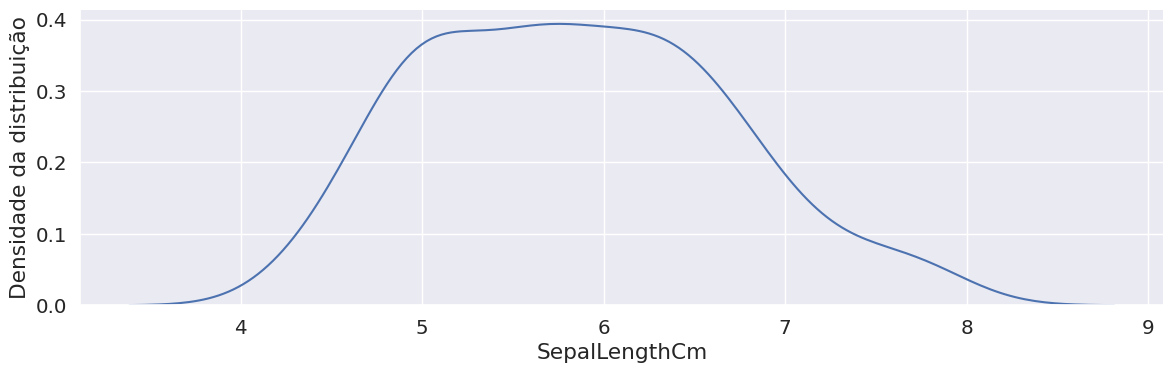

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.3)
coluna = 'SepalLengthCm'

sns.displot(
    iris[coluna],
    height=4,
    aspect=3,
    kind='kde' # Distribuição contínua,
)
plt.ylabel('Densidade da distribuição')
plt.show()

A distribuição amostra da variável tamanho da sépala parece relativamente simétrica, a cauda direita é levemente mais pesada do que a esquerda e há um plato entre 5cm e algo em torno de 6.2 cm.

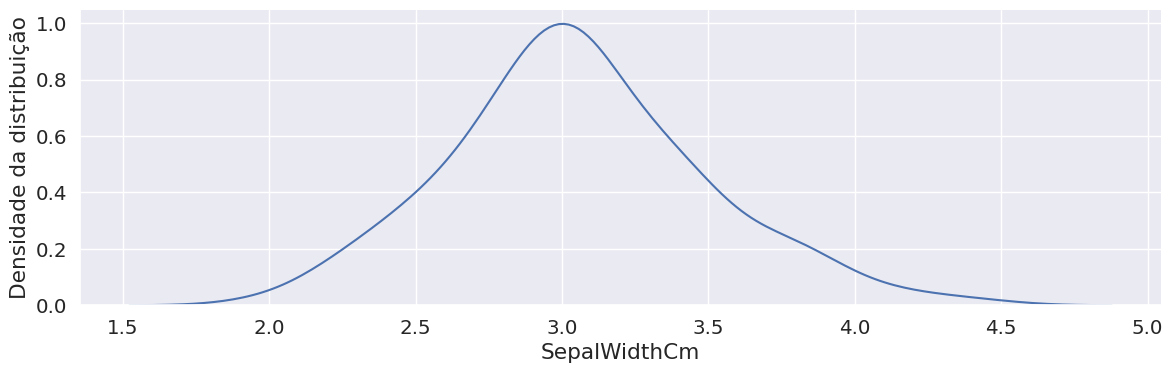

In [7]:
sns.set(font_scale = 1.3)
coluna = 'SepalWidthCm'

sns.displot(
    iris[coluna],
    height=4,
    aspect=3,
    kind='kde' #Distribuição contínua
)
plt.ylabel('Densidade da distribuição')
plt.show()

A distribuição amostral da expessura da sépala lembra um pouco uma normal, mas poderia ser uma Laplace também.

 Como visto o desvio-padrão é o menor entre todas as colunas e isso se refletiu no gráfico, é simétrica e não parece ter caudas pesadas.

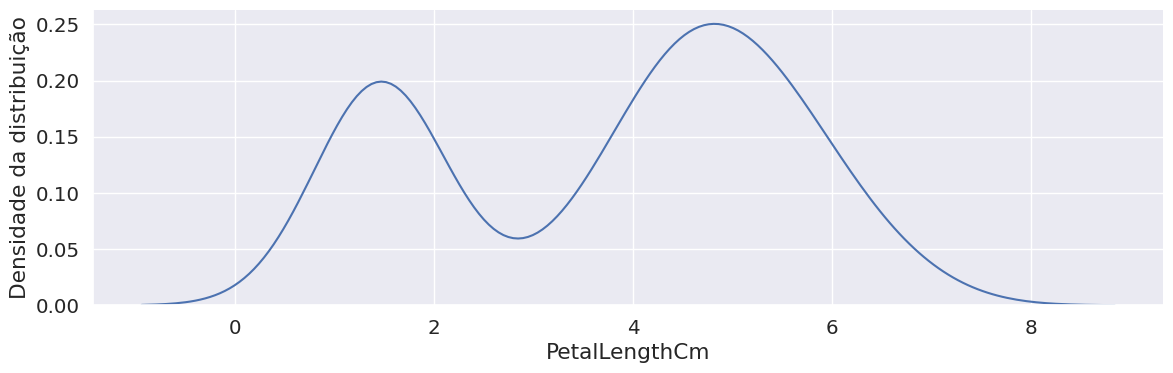

In [8]:
sns.set(font_scale = 1.3)
coluna = 'PetalLengthCm'

sns.displot(
    iris[coluna],
    height=4,
    aspect=3,
    kind='kde' #Distribuição contínua
)
plt.ylabel('Densidade da distribuição')
plt.show()

A dsitribuição do tamanho da pétala apresenta um comportamento em diferente do usual, vemos que ela não é simétrica como pensavamos, mas talvez isso seja porque é uma distribuição amostral, assim como vemos que ela poderia até ser bimodal, se tivéssimos a distribuição exata.

Tem um intervalo onde a distribuição decresce e volta a crescer.

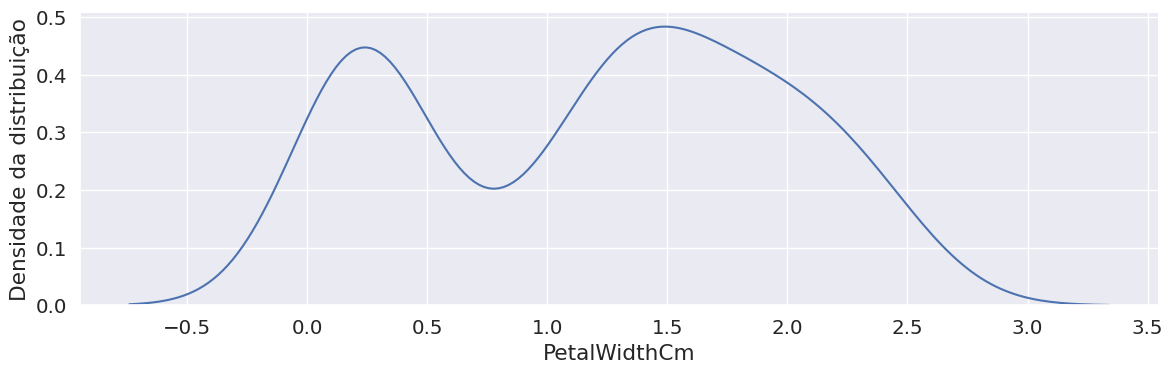

In [9]:
sns.set(font_scale = 1.3)
coluna = 'PetalWidthCm'

sns.displot(
    iris[coluna],
    height=4,
    aspect=3,
    kind='kde' #Distribuição contínua
)
plt.ylabel('Densidade da distribuição')
plt.show()

A expessura da pétala tem um comportamento similar com o gráfico com o comprimento, vemos que essa distribuição amostral é quase bimodal, mais um comportamento de descida e subida. A distribuição parece ter valores negativos, mas na verdade não tem

In [10]:
iris['PetalWidthCm'].min()

0.1

### Densidades filtradas
Vamos agora plotar as densidades de cada variável, mas filtrando pelas categorias da variável resposta.

Primeiro, da variável tamanho da sépala.

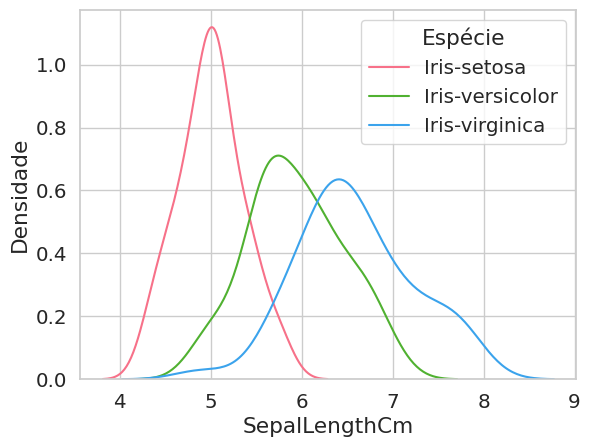

In [11]:
# Defina o estilo de plotagem seaborn
sns.set_style("whitegrid")

# Escolha uma paleta de cores para distinguir as categorias
cores = sns.color_palette("husl", len(iris['Species'].unique()))

# Plote as densidades para cada categoria de Z
for category, color in zip(iris['Species'].unique(), cores):
    sns.kdeplot(data=iris[iris['Species'] == category]['SepalLengthCm'], color=color, label=category)

# Adicione legenda
plt.legend(title='Espécie')

# Adicione rótulos aos eixos
plt.xlabel('SepalLengthCm')
plt.ylabel('Densidade')

# Mostre o plot
plt.show()

Vemos acima que descritivamente, a espécie setosa é aquela que parece ter os menores comprimetos de sépala, além de ter a distribuição com menor descio-padrão dentre as três.

A espécie virgínica apresenta os maiores comprimentos de sépalas, além de ter o maior desvio padrão entre as três.

A espécie versicolor está no meio das outras duas, com um desvio padrão que parece ser alto.

Vamos agora ver a expessura da sépala.

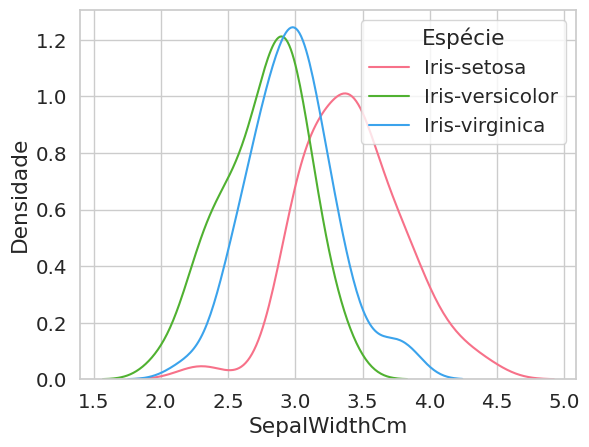

In [12]:
# Defina o estilo de plotagem seaborn
sns.set_style("whitegrid")

# Escolha uma paleta de cores para distinguir as categorias
cores = sns.color_palette("husl", len(iris['Species'].unique()))

# Plote as densidades para cada categoria de Z
for category, color in zip(iris['Species'].unique(), cores):
    sns.kdeplot(data=iris[iris['Species'] == category]['SepalWidthCm'], color=color, label=category)

# Adicione legenda
plt.legend(title='Espécie')

# Adicione rótulos aos eixos
plt.xlabel('SepalWidthCm')
plt.ylabel('Densidade')

# Mostre o plot
plt.show()

Para a expessura da sépala, há uma confusão muito grande entre as três categorias.

Vamos agora ver o tamanho da pétala.

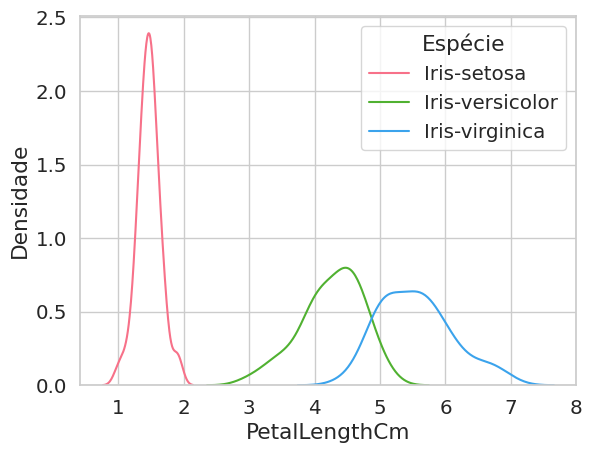

In [13]:
# Defina o estilo de plotagem seaborn
sns.set_style("whitegrid")

# Escolha uma paleta de cores para distinguir as categorias
cores = sns.color_palette("husl", len(iris['Species'].unique()))

# Plote as densidades para cada categoria de Z
for category, color in zip(iris['Species'].unique(), cores):
    sns.kdeplot(data=iris[iris['Species'] == category]['PetalLengthCm'], color=color, label=category)

# Adicione legenda
plt.legend(title='Espécie')

# Adicione rótulos aos eixos
plt.xlabel('PetalLengthCm')
plt.ylabel('Densidade')

# Mostre o plot
plt.show()

Vemos que a espécie setosa apresenta os menores tamanhos de pétalas com baixa dispersão, não havendo nenhuma confusão com as demais categorias, e para as outras duas categorias a confusão parece não ser muito grande, com as dispersões sendo parecidas e com a espécie virgínica tendo valores maiores.

Essa parece ser uma variável importante para a classificação.

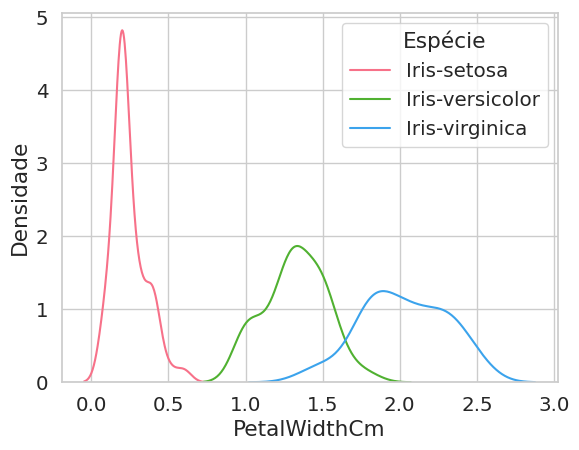

In [14]:
# Defina o estilo de plotagem seaborn
sns.set_style("whitegrid")

# Escolha uma paleta de cores para distinguir as categorias
cores = sns.color_palette("husl", len(iris['Species'].unique()))

# Plote as densidades para cada categoria de Z
for category, color in zip(iris['Species'].unique(), cores):
    sns.kdeplot(data=iris[iris['Species'] == category]['PetalWidthCm'], color=color, label=category)

# Adicione legenda
plt.legend(title='Espécie')

# Adicione rótulos aos eixos
plt.xlabel('PetalWidthCm')
plt.ylabel('Densidade')

# Mostre o plot
plt.show()

Vemos que a espécie setosa apresenta as menores expessuras de pétalas com baixa dispersão, além disso as outras duas variáveis tem baixa confusão entre si, com a espécie virgínica tendo as maiores expessuras de pétalas, com alta dispersão.

Temos assim então que, pelo menos do ponto de vista descritivo, a pétala parece ser uma característica mais importante para classificar adequadamente as espécies.

### Boxplot das variáveis

Vamos começar com boxplots das 4 variáveis, considerando todas as 150 observações.

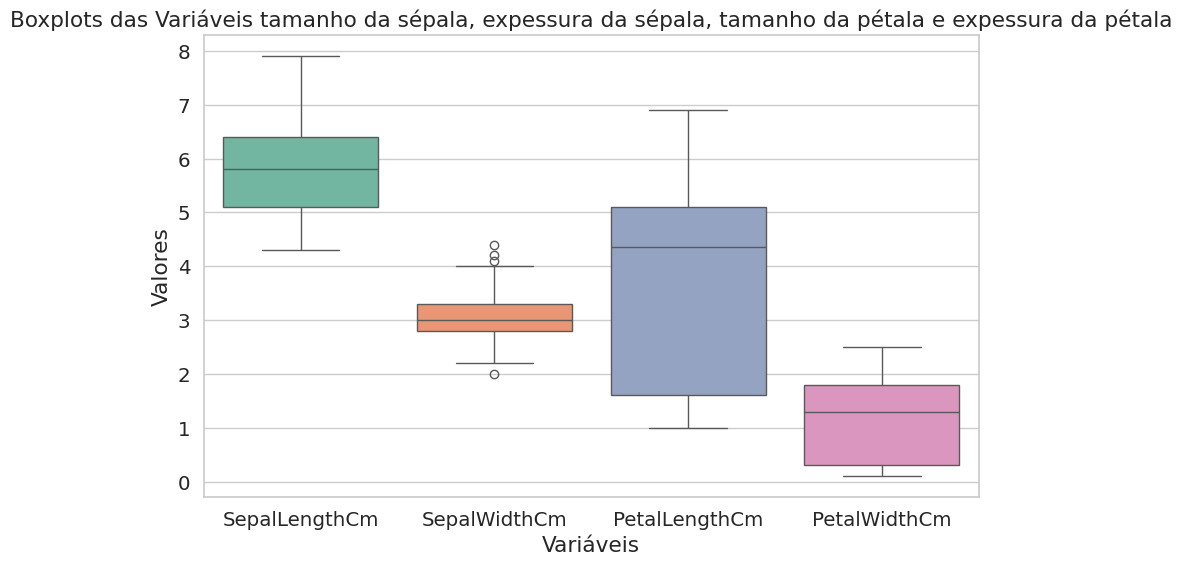

In [15]:
iris_nova = iris.drop('Id',axis=1)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Plote os boxplots para cada variável
sns.boxplot(data=iris_nova, orient='v', palette='Set2')

# Adicione rótulos aos eixos
plt.xlabel('Variáveis')
plt.ylabel('Valores')

# Adicione um título
plt.title('Boxplots das Variáveis tamanho da sépala, expessura da sépala, tamanho da pétala e expessura da pétala')

# Mostre o plot
plt.show()

Vemos pelo gráfico acima que a escala realmente enganou sobre as simetrias, as medidas da pétala tem a mediana muito próxima do terceiro quartil, indicando a assimetria observada mais acima.

A expessura da sépada condiz com o que foi visto, desvio padrão baixo, relativamente simétrica. mediana próxima da média e temos alguns outliers.

O tamanho da sépala se mostra coerente com o que foi visto acima, sem pontos aberrantes, relativamente simétrico, mediana perto da média, desvio padrão não muito alto, mesmo para a escala da medida.



Vamos agora tentar fazer os boxplots, filtrados pelas espécies.

<ipython-input-16-4d679a5c54dc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_nova,x=colunas_numericas[coluna],y='Species',ax=eixo[coluna],orient='h',palette='Set2')
<ipython-input-16-4d679a5c54dc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_nova,x=colunas_numericas[coluna],y='Species',ax=eixo[coluna],orient='h',palette='Set2')
<ipython-input-16-4d679a5c54dc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_nova,x=colunas_numericas[coluna],y='Species',ax=eixo[coluna],orient='h',palette='Set2')
<ipython-i

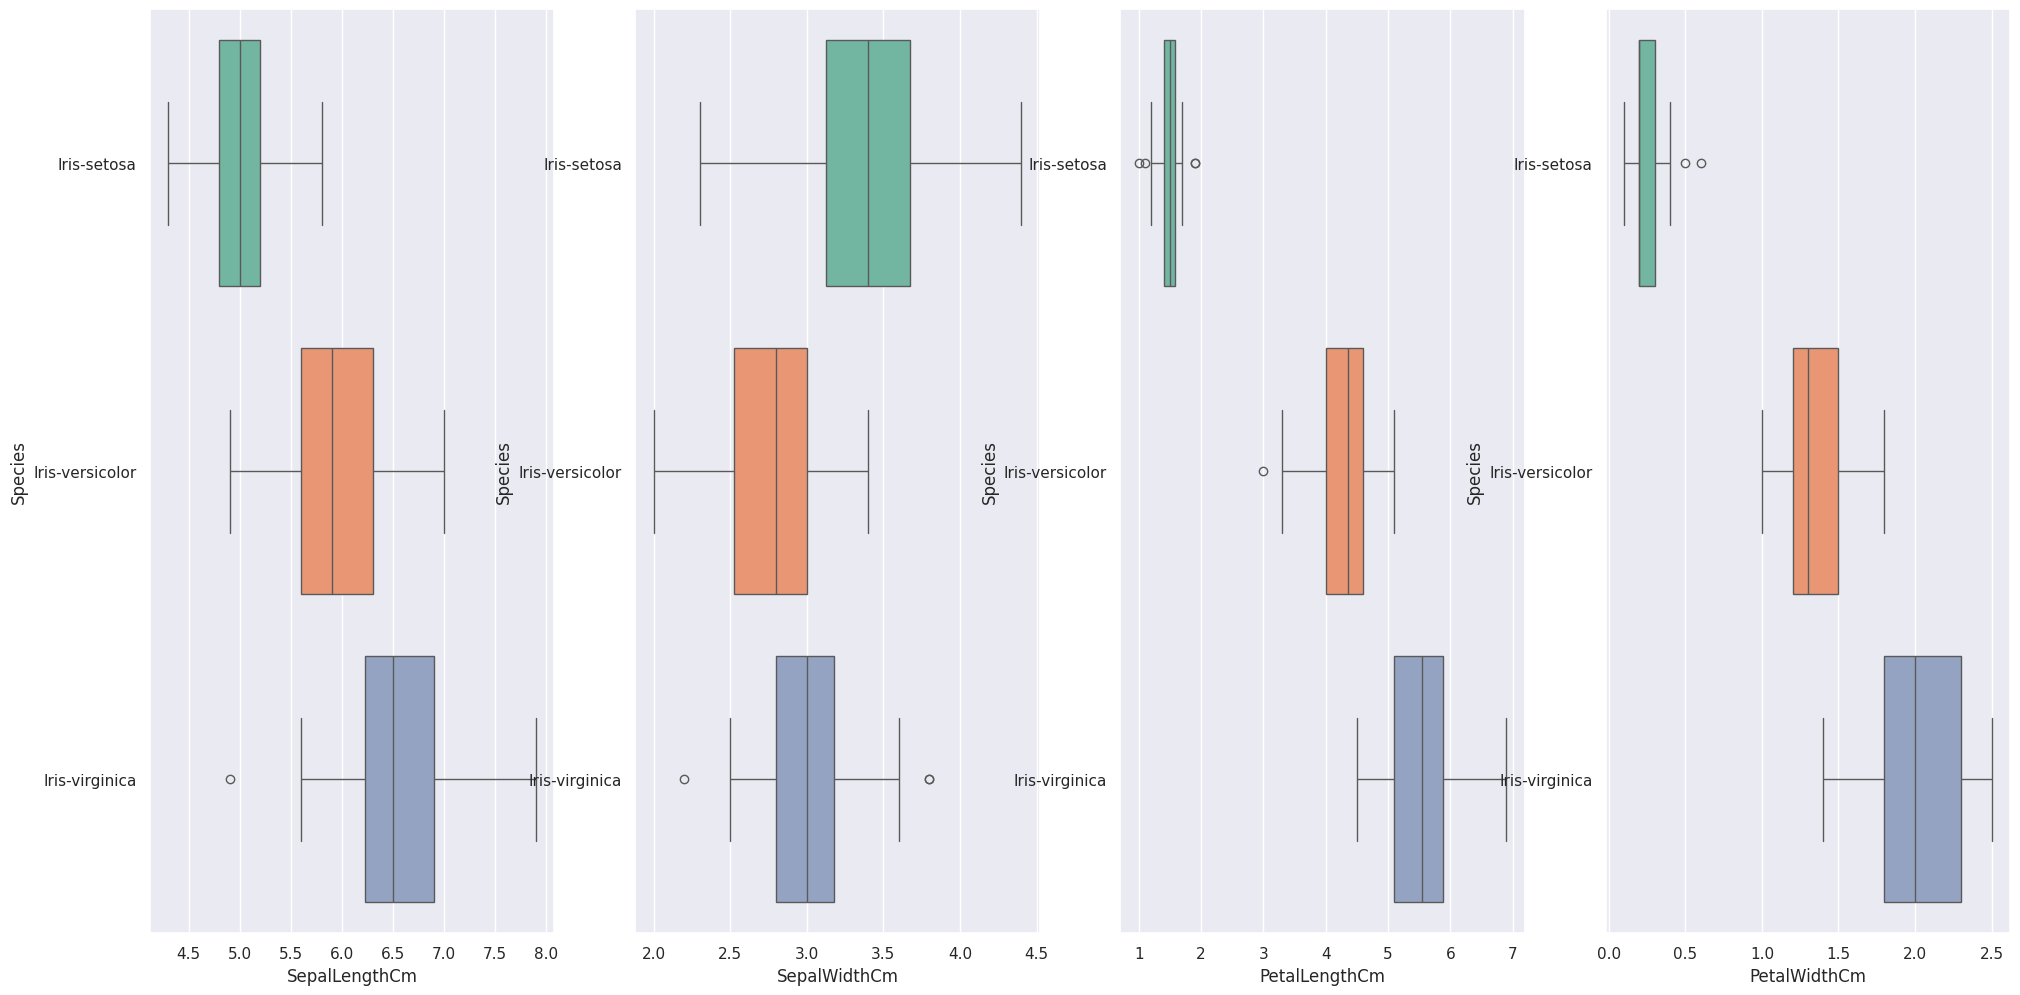

In [16]:
colunas_numericas = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','']
sns.set(font_scale=1.0)
fig, eixo = plt.subplots(1,4,figsize=(24,12))
for coluna in range(4):
    if colunas_numericas[coluna] != '':
        sns.boxplot(data=iris_nova,x=colunas_numericas[coluna],y='Species',ax=eixo[coluna],orient='h',palette='Set2')


Vemos acima as informações que já descrevemos, com a exceção de que agora podemos ver para cada variável outliers por espécie.

### Matriz de correlação, mapeada por calor

Vamos ver as correlações entre as colunas

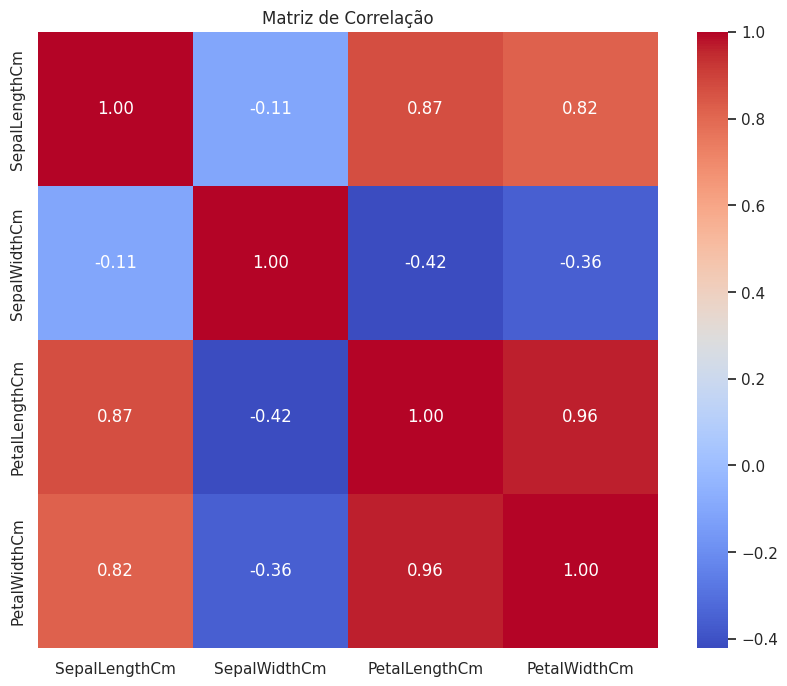

In [17]:
dados_corr = iris_nova.copy()
dados_corr = dados_corr.drop('Species',axis=1)
correlation_matrix = dados_corr.corr()

# Cria um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura conforme necessário
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Anota os valores de correlação
plt.title('Matriz de Correlação')
plt.show()

Vemos acima uma coisa bem inesperada, que é o fato de que as medidas feitas na sépala tem uma baixa correlação entre si, que é de $-0.11$, e as medidas feitas na pétala tem uma correlação bem forte entre si, que vale $0.96$.

Vemos que a expessura da sépala tem uma correlação negativa com todas as outras variáveis, com nenhuma sendo muito forte.

Com exceção das correlações que envolvem a sépala, as outras são positivas e muito fortes.

Esses resultados são coerentes com as outras visualizações vistas acima, uma vez que a expessura da sépala se mostrou como a variável com a maior confusão entre as diferentes espécies e as medidas da pétala como as de menor confusão.

#Limpar a base de dados

Como a base de dados não possui valor faltante e as variáveis se mostraram bem estruturadas em relação ao tipo, parece que não será necessário fazer limpeza na base de dados.

# Prepararção para ajuste dos modelos

Primeiro, vamos dividir a base em conjunto de treino e conjunto de teste.

In [18]:
from sklearn.model_selection import train_test_split

y = iris_nova['Species']
X = iris_nova.drop('Species',axis=1)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Vamos agora ajustar modelos para classificação.

Vamos ajustar o k vizinhos mais próximos, uma regressão multinomial, e uma floresta aleatória de classificação, vamos ajustar com diferentes parâmetros de profundidade para cada um.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn3 = KNeighborsClassifier(n_neighbors=3) #3 Vizinhos mais próximos

knn5 = KNeighborsClassifier(n_neighbors=5) #5 Vizinhos mais próximos

knn7 = KNeighborsClassifier(n_neighbors=7) #7 Vizinhos mais próximos

knn10 = KNeighborsClassifier(n_neighbors=10) #10 Vizinhos mais próximos



# Treine o classificador com os dados de treinamento
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn7.fit(X_train, y_train)
knn10.fit(X_train, y_train)


# Faça previsões nos dados de teste
y_pred3 = knn3.predict(X_test)
y_pred5 = knn5.predict(X_test)
y_pred7 = knn7.predict(X_test)
y_pred10 = knn10.predict(X_test)

# Calcule a acurácia das previsões
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy5 = accuracy_score(y_test, y_pred5)
accuracy7 = accuracy_score(y_test, y_pred7)
accuracy10 = accuracy_score(y_test, y_pred10)

print("Acurácia usando k=3:", accuracy3)
print("Acurácia usando k=5:", accuracy5)
print("Acurácia usando k=7:", accuracy7)
print("Acurácia usando k=10:", accuracy10)

Acurácia usando k=3: 1.0
Acurácia usando k=5: 1.0
Acurácia usando k=7: 0.9666666666666667
Acurácia usando k=10: 1.0


Surpreendentemente, três dos modelos ajustados deram acurácia igual a 1, significa que as predições do conjunto de teste foram todas corretas.

Antes de prosseguir, vamos fazer uma pequena investigação para ver se isso de fato faz sentido.

Vamos divir a base de dados em treino e teste com outras sementes de geração aleatória.

In [21]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=11)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=22)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=33)

knn3 = KNeighborsClassifier(n_neighbors=3) #3 Vizinhos mais próximos
knn5 = KNeighborsClassifier(n_neighbors=5) #5 Vizinhos mais próximos

knn3.fit(X_train1, y_train1) #Ajuste knn com 3 vizinhos e a primeira divisão
knn5.fit(X_train1, y_train1)#Ajuste knn com 5 vizinhos e a primeira divisão

# Faça previsões nos dados de teste
y_pred3 = knn3.predict(X_test1) #Valores preditos da primeira divisão
y_pred5 = knn5.predict(X_test1) #Valores preditos da primeira divisão

# Calcule a acurácia das previsões
accuracy3 = accuracy_score(y_test1, y_pred3) #Acurácia da primeira divisão
accuracy5 = accuracy_score(y_test1, y_pred5) #Acurácia da segunda divisão

print("Acurácia da primeira divisão usando k=3:", accuracy3)
print("Acurácia da primeira divisão usando k=5:", accuracy5)


###############################################################################


knn3.fit(X_train2, y_train2) #Ajuste knn com 3 vizinhos e a primeira divisão
knn5.fit(X_train2, y_train2)#Ajuste knn com 5 vizinhos e a primeira divisão

# Faça previsões nos dados de teste
y_pred3 = knn3.predict(X_test2) #Valores preditos da segunda divisão
y_pred5 = knn5.predict(X_test2) #Valores preditos da segunda divisão

# Calcule a acurácia das previsões
accuracy3 = accuracy_score(y_test2, y_pred3) #Acurácia da segunda divisão
accuracy5 = accuracy_score(y_test2, y_pred5) #Acurácia da segunda divisão

print("Acurácia da segunda divisão usando k=3:", accuracy3)
print("Acurácia da segunda divisão usando k=5:", accuracy5)

############################################################################

knn3.fit(X_train3, y_train3) #Ajuste knn com 3 vizinhos e a terceira divisão
knn5.fit(X_train3, y_train3)#Ajuste knn com 5 vizinhos e a terceira divisão

# Faça previsões nos dados de teste
y_pred3 = knn3.predict(X_test3) #Valores preditos da terceira divisão
y_pred5 = knn5.predict(X_test3) #Valores preditos da terceira divisão

# Calcule a acurácia das previsões
accuracy3 = accuracy_score(y_test3, y_pred3) #Acurácia da terceira divisão
accuracy5 = accuracy_score(y_test3, y_pred5) #Acurácia da terceira divisão

print("Acurácia da terceira divisão usando k=3:", accuracy3)
print("Acurácia da terceira divisão usando k=5:", accuracy5)








Acurácia da primeira divisão usando k=3: 0.9333333333333333
Acurácia da primeira divisão usando k=5: 0.9666666666666667
Acurácia da segunda divisão usando k=3: 0.9736842105263158
Acurácia da segunda divisão usando k=5: 0.9736842105263158
Acurácia da terceira divisão usando k=3: 0.9777777777777777
Acurácia da terceira divisão usando k=5: 0.9555555555555556


Vemos acima que de fato a seed influenciou o resultado, mas no geral o k vizinhos mais próximos parece perforamar bem para classificar as espécies das íris.

Vamos ajustar os outros dois modelos, mas agora com um conjunto de teste um pouco maior visto que temos apenas 150 observações no total.

Acurácia da regressão multinomial: 0.9777777777777777


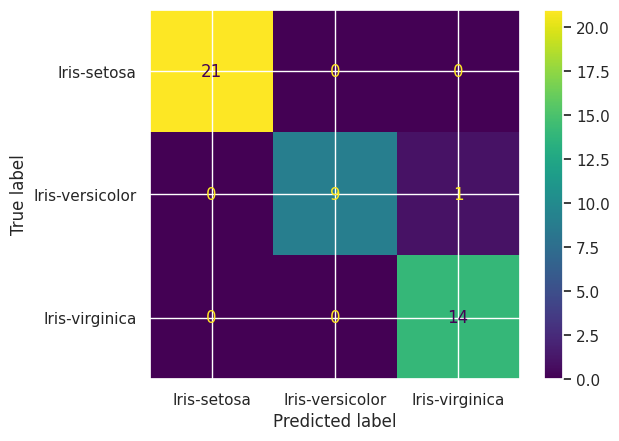

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Acurácia da regressão multinomial:',accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
confusion_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
confusion_display.plot()




Vemos que o modelo apresentou 97.777% de acurácia, o que parece uma boa performance, dentre o modelo do k vizinhos mais próximos, o melhor deles obteve essa mesma performance.

Vamos agora ajustar uma floresta aleatória para classificação.

Accuracy: 1.0


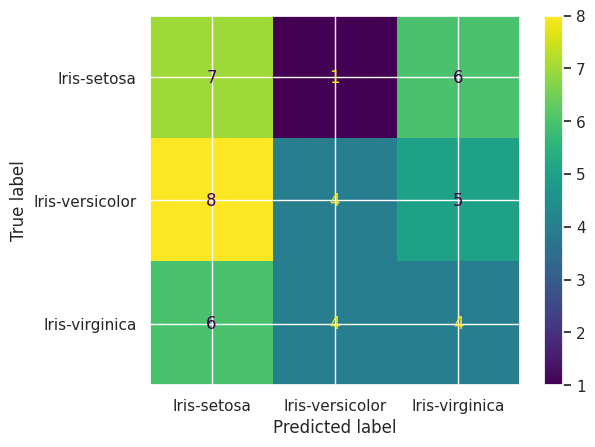

In [39]:
from sklearn.ensemble import RandomForestClassifier

def floresta_class(n,profundidade,X,y):
    # Recebe 'n' que é a quantidade de arvores, X que são as covariáveis, y que é
    # a resposta e a profundidade da árvore
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)


    # Criar e ajustar o modelo de Floresta Aleatória com profundidade máxima de 3
    rf_model = RandomForestClassifier(n_estimators=n, max_depth=profundidade)
    rf_model.fit(X_train, y_train)

    # Fazer predições no conjunto de teste
    y_pred_rf = rf_model.predict(X_test)

    # Avaliar a precisão do modelo
    accuracy = accuracy_score(y_test, y_pred_rf)
    print("Accuracy:", accuracy)

    # Imprimir a matriz de confusão
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
    confusion_display.plot()

floresta_class(100,3,X,y)






Accuracy: 1.0


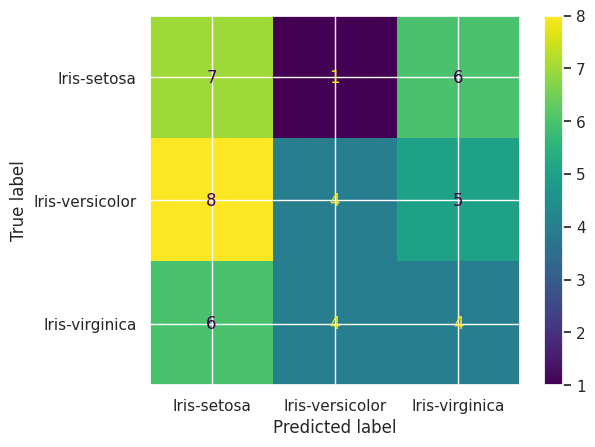

In [40]:
floresta_class(100,5,X,y)

Accuracy: 0.9777777777777777


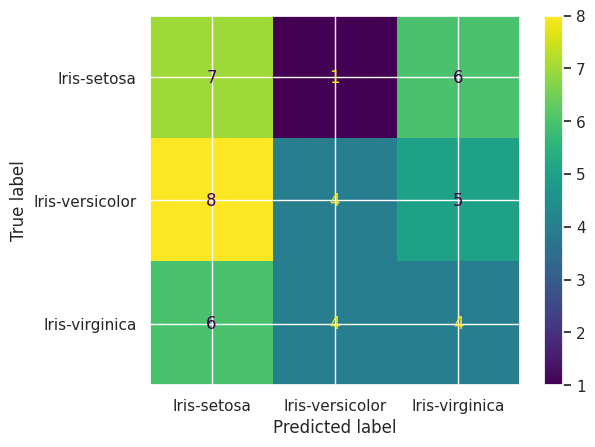

In [41]:
floresta_class(100,10,X,y)

Accuracy: 0.9777777777777777


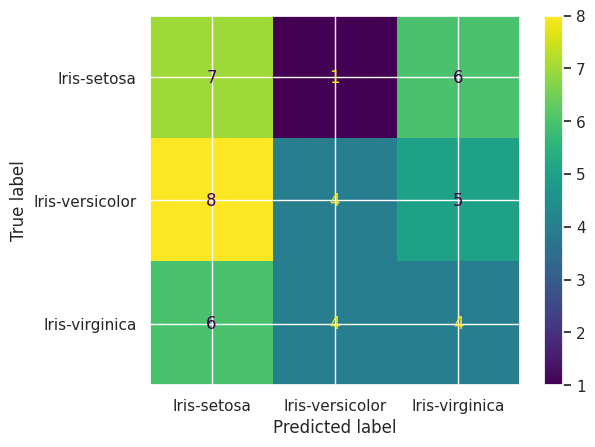

In [42]:
floresta_class(100,15,X,y)

Vemos que duas das florestas acima atingiram 1 de acurácia, embora saibamos que isso provavelmente ocorreu também por causa da seed, achamos que não valeria a pena testar a porformance do algoritmo para outras seeds, assim, acabamos por aqui.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Criar e ajustar o modelo de Floresta Aleatória com profundidade máxima de 3
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_model.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Imprimir a matriz de confusão
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
